In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Sex,M,M,F,M,I,I,F,F,M,F
Length,0.455,0.35,0.53,0.44,0.33,0.425,0.53,0.545,0.475,0.55
Diameter,0.365,0.265,0.42,0.365,0.255,0.3,0.415,0.425,0.37,0.44
Height,0.095,0.09,0.135,0.125,0.08,0.095,0.15,0.125,0.125,0.15
Whole weight,0.514,0.2255,0.677,0.516,0.205,0.3515,0.7775,0.768,0.5095,0.8945
Shucked weight,0.2245,0.0995,0.2565,0.2155,0.0895,0.141,0.237,0.294,0.2165,0.3145
Viscera weight,0.101,0.0485,0.1415,0.114,0.0395,0.0775,0.1415,0.1495,0.1125,0.151
Shell weight,0.15,0.07,0.21,0.155,0.055,0.12,0.33,0.26,0.165,0.32
Rings,15,7,9,10,7,8,20,16,9,19


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
df['Sex'] =df['Sex'].map({'F':0, 'M':1, 'I':2})

In [8]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Sex,1.0000,1.0000,0.0000,1.0000,2.0000,2.0000,0.0000,0.0000,1.0000,0.0000
Length,0.4550,0.3500,0.5300,0.4400,0.3300,0.4250,0.5300,0.5450,0.4750,0.5500
Diameter,0.3650,0.2650,0.4200,0.3650,0.2550,0.3000,0.4150,0.4250,0.3700,0.4400
Height,0.0950,0.0900,0.1350,0.1250,0.0800,0.0950,0.1500,0.1250,0.1250,0.1500
Whole weight,0.5140,0.2255,0.6770,0.5160,0.2050,0.3515,0.7775,0.7680,0.5095,0.8945
Shucked weight,0.2245,0.0995,0.2565,0.2155,0.0895,0.1410,0.2370,0.2940,0.2165,0.3145
Viscera weight,0.1010,0.0485,0.1415,0.1140,0.0395,0.0775,0.1415,0.1495,0.1125,0.1510
Shell weight,0.1500,0.0700,0.2100,0.1550,0.0550,0.1200,0.3300,0.2600,0.1650,0.3200
Rings,15.0000,7.0000,9.0000,10.0000,7.0000,8.0000,20.0000,16.0000,9.0000,19.0000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [14]:
corr = df.corr()

In [15]:
corr

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.503697,-0.516450,-0.477850,-0.501511,-0.459731,-0.505693,-0.499103,-0.401445
Length,-0.503697,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.516450,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.477850,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.501511,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.459731,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.505693,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.499103,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.401445,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

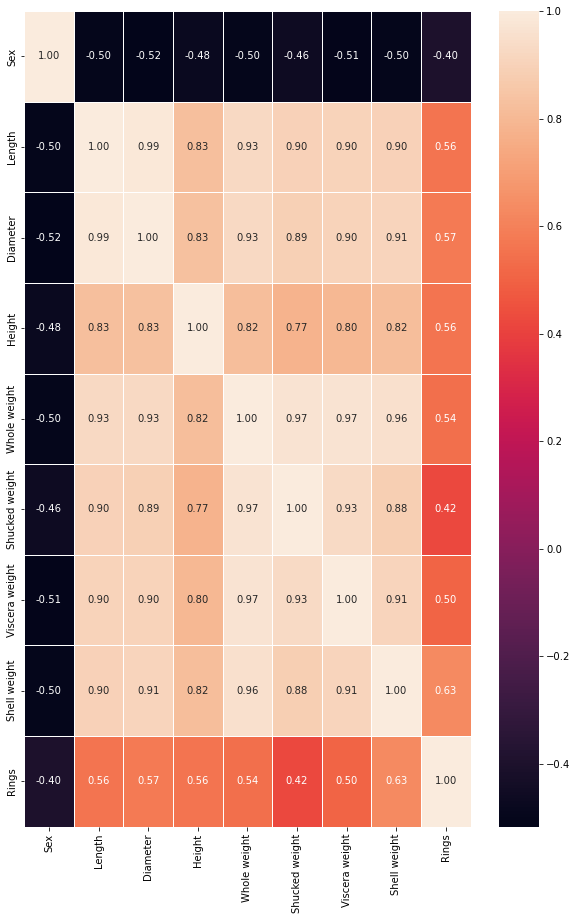

In [16]:
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(), annot=True, linewidth=1, linecolor='white', fmt='0.2f')

In [18]:
cor = corr.Rings
print(cor)

Sex              -0.401445
Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64


In [19]:
cor = cor.drop(['Rings'],axis=0)

In [29]:
cor.sort_values(ascending = False)

Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex              -0.401445
Name: Rings, dtype: float64

In [30]:
df1 = df.drop(['Sex'], axis= 1)

In [31]:
x = df1.drop(['Rings'], axis=1)
y = df1.Rings

In [32]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.33,random_state=45)

In [33]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
pred = lr.predict(xtest)

<AxesSubplot:xlabel='Rings', ylabel='Density'>

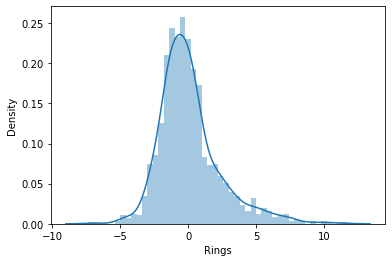

In [37]:
sns.distplot(ytest-pred)

In [38]:
print(np.sqrt(mean_squared_error(ytest,pred)))

2.273879937921886


In [40]:
r2 = r2_score(ytest,pred)
r2

0.514346904005573

In [41]:
lr.score(xtest,ytest)

0.514346904005573

In [42]:
df = pd.DataFrame(pred)
df.to_csv('Rings.csv')